In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
match_det_aus = pd.read_csv('aus_data.csv')
match_det_aus = match_det_aus[['Teams','Start Date','Won','Tied']]
match_det_aus = match_det_aus[match_det_aus['Tied'] !=1]
match_det_aus['year'] = pd.to_datetime(match_det_aus['Start Date']).dt.year

In [19]:
match_det_aus.groupby(['year','Won']).size().unstack('Won')

Won,0,1
year,,
2014,4,9
2015,4,15
2016,12,17
2017,10,5
2018,11,2
2019,2,1


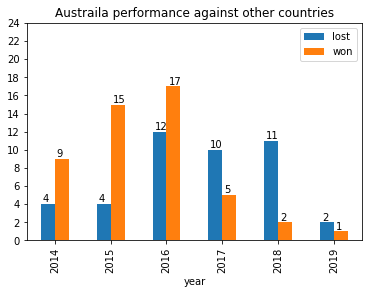

In [72]:
ax = match_det_aus.groupby(['year','Won']).size().unstack('Won').plot(kind='bar',title="Austraila performance against other countries")
ax.legend(['lost','won'])
ax.set_yticks(np.arange(0,26,step=2));
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(p.get_height(),(p.get_x(),p.get_height()),xytext=(2, 2),textcoords='offset points')

In [306]:
print((match_det_aus['Won'].sum()/match_det_aus['Won'].count())*100)
print((match_det_aus[match_det_aus['year']>=2017]['Won'].sum()/match_det_aus[match_det_aus['year']>=2017]['Won'].count())*100)

53.2608695652174
25.806451612903224


In [38]:
match_det_ind = pd.read_csv('india_data.csv')
match_det_ind = match_det_ind[['Teams','Start Date','Won','Tied']]
match_det_ind = match_det_ind[match_det_ind['Tied'] !=1]
match_det_ind['year'] = pd.to_datetime(match_det_ind['Start Date']).dt.year

In [39]:
match_det_ind.groupby(['year','Won']).size().unstack('Won')

Won,0,1
year,,
2014,5,14
2015,10,13
2016,6,7
2017,8,21
2018,4,14
2019,2,6


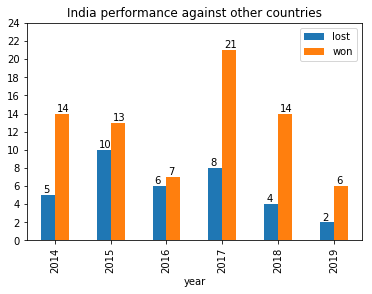

In [70]:
ax = match_det_ind.groupby(['year','Won']).size().unstack('Won').plot(kind='bar',title="India performance against other countries")
ax.legend(['lost','won'])
ax.set_yticks(np.arange(0,26,step=2));


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(p.get_height(),(p.get_x(),p.get_height()),xytext=(2, 2),textcoords='offset points')

In [147]:
df=pd.read_csv('india_data.csv')
df['countries'] = df['Teams'].str.split(',').str[0].str.split(' at ').str[0].str.strip()
df['venue'] = df['Teams'].str.split(',').str[0].str.split(' at ').str[1].str.strip()
df = df[df['Tied'] !=1]
df['year'] = pd.to_datetime(df['Start Date']).dt.year

In [86]:
IndVsAus_data = df[(df['countries'] == 'India v Australia') | (df['countries'] == 'Australia v India')]
IndVsAus_data = IndVsAus_data[['countries','venue','Won','Tied','Start Date']]


In [111]:
IndVsAus_data.groupby(['year','Won']).size().unstack('Won').fillna(0)

Won,0,1
year,,
2015,3.0,0.0
2016,4.0,1.0
2017,1.0,4.0
2019,1.0,2.0


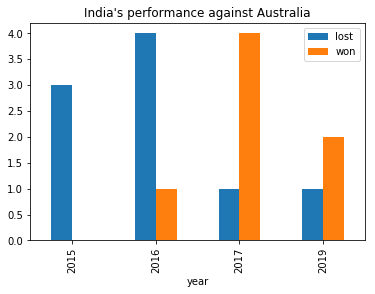

In [113]:
ax = IndVsAus_data.groupby(['year','Won']).size().unstack('Won').fillna(0).plot(kind='bar',title="India's performance against Australia")
ax.legend(['lost','won']);

In [179]:
matches_in_india = df[(df['countries'] == 'India v Australia')]
matches_in_india.groupby(['year','Won']).size()

year  Won
2017  0      1
      1      4
dtype: int64

In [307]:
print((match_det_ind['Won'].sum()/match_det_ind['Won'].count())*100)
print((match_det_ind[match_det_ind['year']>=2017]['Won'].sum()/match_det_ind[match_det_ind['year']>=2017]['Won'].count())*100)

68.18181818181817
74.54545454545455


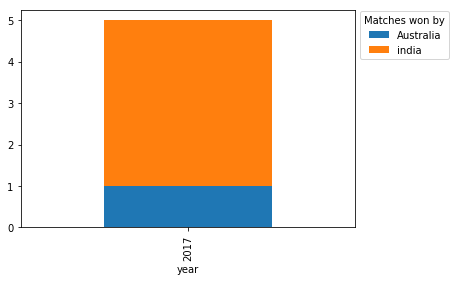

In [178]:
ax=matches_in_india.groupby(['year','Won']).size().unstack('Won').plot(kind='bar',stacked=True)
ax.legend(['Australia','india'],title='Matches won by',loc='lower left',bbox_to_anchor=(1.0, 0.75));

In [308]:
print((IndVsAus_data['Won'].sum()/IndVsAus_data['Won'].count())*100)
print((IndVsAus_data[IndVsAus_data['year']>=2017]['Won'].sum()/IndVsAus_data[IndVsAus_data['year']>=2017]['Won'].count())*100)

43.75
75.0


In [218]:
df_squad = pd.read_excel('Squad.xlsx')

In [244]:
df_player = pd.read_csv('player_data.csv')
df_player = pd.merge(df_squad,df_player,how='left')[['Player','Country','Role','Span','Mat','Runs','Bat Av','Wkts','Bowl Av','5']]
df_player['Player']=df_player['Player'].str.split("(").str[0]

In [248]:
df_player.fillna(0,inplace=True)
df_player['Mat'] = df_player['Mat'].apply(lambda x: int(x))
df_player.sort_values('Mat')

,Player,Country,Role,Span,Mat,Runs,Bat Av,Wkts,Bowl Av,5
25,AJ Turner,Australia,All rounder,0,0,0,0,0,0,0
29,JP Behrendorff,Australia,Bowler,2019-2019,2,1,-,3,30.33,0
6,RR Pant,India,Batsman/WK,2018-2018,3,41,20.50,-,-,-
11,S Kaul,India,Bowler,2018-2018,3,1,0.50,0,-,0
20,DJM Short,Australia,Batsman,2018-2018,4,83,27.66,0,-,0
9,V Shankar,India,All rounder,2019-2019,4,45,45.00,0,-,0
24,JA Richardson,Australia,All rounder,2018-2019,7,39,9.75,13,29.46,0
17,AT Carey,Australia,Batsman,2018-2019,9,246,27.33,-,-,-
21,PSP Handscomb,Australia,Batsman,2017-2019,11,300,30.00,-,-,-
5,KL Rahul,India,Batsman,2016-2018,13,317,35.22,-,-,-


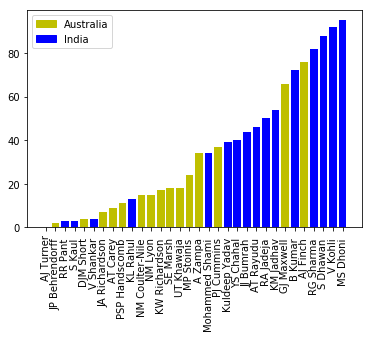

In [293]:
df_player_s=df_player.sort_values('Mat')
plt.bar(df_player_s['Player'],df_player_s['Mat'],color=df_player_s.Country.map({'Australia':'y','India':'b'}))
plt.xticks(rotation=90)
Aus = mpatches.Patch(color='y', label='Australia')
Ind = mpatches.Patch(color='b', label='India')
plt.legend(handles=[Aus,Ind])
plt.show()

In [335]:
df_player.replace({'-':0},inplace=True)
df_player['Bat Av'] = df_player['Bat Av'].astype(float) 
list(df_player[df_player['Mat']>20].sort_values('Bat Av',ascending=False)['Player'].head(10))

['V Kohli ',
 'RG Sharma ',
 'AT Rayudu ',
 'S Dhawan ',
 'MS Dhoni ',
 'KM Jadhav ',
 'MP Stoinis ',
 'AJ Finch ',
 'GJ Maxwell ',
 'RA Jadeja ']

In [347]:
df_player['Bowl Av'] = df_player['Bowl Av'].astype(float) 
df_player['Wkts'] = df_player['Wkts'].apply(lambda x:int(x))
list(df_player[(df_player['Mat']>20) & (df_player['Bowl Av']>0) & (df_player['Wkts']>30)].sort_values('Bowl Av')['Player'].head(10))

['Kuldeep Yadav ',
 'JJ Bumrah ',
 'Mohammed Shami ',
 'YS Chahal ',
 'PJ Cummins ',
 'GJ Maxwell ',
 'B Kumar ',
 'A Zampa ',
 'RA Jadeja ']

In [351]:
df_batting=pd.read_csv('batting.csv')
df_batting

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (INDIA),2014-2019,92,91,19,5088,160*,70.66,5291,96.16,21,19,3,455,67
1,RG Sharma (INDIA),2014-2019,82,82,11,4489,264,63.22,4620,97.16,18,18,4,416,153
2,S Dhawan (INDIA),2014-2019,88,88,5,3866,137,46.57,4108,94.10,10,22,2,482,53
3,DA Warner (AUS),2014-2018,64,63,4,3056,179,51.79,2936,104.08,12,9,1,326,54
4,SPD Smith (AUS),2014-2018,74,71,8,3032,164,48.12,3519,86.16,8,19,3,260,27
5,AJ Finch (AUS),2014-2019,76,73,1,2672,135,37.11,3035,88.03,8,16,6,267,60
6,AM Rahane (INDIA),2014-2018,67,64,3,2449,111,40.14,3041,80.53,3,21,3,243,29
7,MS Dhoni (INDIA),2014-2019,95,72,18,2369,134,43.87,2861,82.80,1,16,2,173,47
8,GJ Maxwell (AUS),2014-2019,66,58,4,1706,102,31.59,1413,120.73,1,10,7,180,47
9,AT Rayudu (INDIA),2014-2019,46,42,13,1503,124*,51.82,1823,82.44,3,9,3,130,28


In [376]:
df_batting_boundaries = pd.merge(df_squad,df_batting,how='left')[['Player','Country','Role','Span','Mat','Runs','BF','SR','4s','6s']]
df_batting_boundaries.fillna(0,inplace=True)
df_batting_boundaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 10 columns):
Player     32 non-null object
Country    32 non-null object
Role       32 non-null object
Span       32 non-null object
Mat        32 non-null float64
Runs       32 non-null object
BF         32 non-null object
SR         32 non-null object
4s         32 non-null object
6s         32 non-null object
dtypes: float64(1), object(9)
memory usage: 2.8+ KB


In [377]:
df_batting_boundaries['BF']=df_batting_boundaries['BF'].apply(lambda x:int(x))
df_batting_boundaries['4s']=df_batting_boundaries['4s'].apply(lambda x:int(x))
df_batting_boundaries['6s']=df_batting_boundaries['6s'].apply(lambda x:int(x))

df_batting_boundaries_new= df_batting_boundaries[(df_batting_boundaries['Role']=='Batsman') | (df_batting_boundaries['Role']=='Batsman/WK')].copy()

df_batting_boundaries_new['4_rate'] = df_batting_boundaries_new['BF']/df_batting_boundaries_new['4s']
df_batting_boundaries_new['6_rate'] = df_batting_boundaries_new['BF']/df_batting_boundaries_new['6s']

In [386]:
df_batting_boundaries_new[df_batting_boundaries_new['BF']>1000].sort_values('6_rate',ascending=False)

,Player,Country,Role,Span,Mat,Runs,BF,SR,4s,6s,4_rate,6_rate
0,V Kohli (INDIA),India,Batsman,2014-2019,92.0,5088,5291,96.16,455,67,11.628571,78.970149
3,S Dhawan (INDIA),India,Batsman,2014-2019,88.0,3866,4108,94.10,482,53,8.522822,77.509434
4,AT Rayudu (INDIA),India,Batsman,2014-2019,46.0,1503,1823,82.44,130,28,14.023077,65.107143
7,MS Dhoni (INDIA),India,Batsman/WK,2014-2019,95.0,2369,2861,82.80,173,47,16.537572,60.872340
16,AJ Finch (AUS),Australia,Batsman,2014-2019,76.0,2672,3035,88.03,267,60,11.367041,50.583333
2,RG Sharma (INDIA),India,Batsman,2014-2019,82.0,4489,4620,97.16,416,153,11.105769,30.196078


In [389]:
df_batting_boundaries_new[df_batting_boundaries_new['BF']>1000].sort_values('4_rate',ascending=False)

,Player,Country,Role,Span,Mat,Runs,BF,SR,4s,6s,4_rate,6_rate
7,MS Dhoni (INDIA),India,Batsman/WK,2014-2019,95.0,2369,2861,82.80,173,47,16.537572,60.872340
4,AT Rayudu (INDIA),India,Batsman,2014-2019,46.0,1503,1823,82.44,130,28,14.023077,65.107143
0,V Kohli (INDIA),India,Batsman,2014-2019,92.0,5088,5291,96.16,455,67,11.628571,78.970149
16,AJ Finch (AUS),Australia,Batsman,2014-2019,76.0,2672,3035,88.03,267,60,11.367041,50.583333
2,RG Sharma (INDIA),India,Batsman,2014-2019,82.0,4489,4620,97.16,416,153,11.105769,30.196078
3,S Dhawan (INDIA),India,Batsman,2014-2019,88.0,3866,4108,94.10,482,53,8.522822,77.509434


In [391]:
df_batting_boundaries_new[df_batting_boundaries_new['BF']>1000].sort_values('SR',ascending=False)

,Player,Country,Role,Span,Mat,Runs,BF,SR,4s,6s,4_rate,6_rate
2,RG Sharma (INDIA),India,Batsman,2014-2019,82.0,4489,4620,97.16,416,153,11.105769,30.196078
0,V Kohli (INDIA),India,Batsman,2014-2019,92.0,5088,5291,96.16,455,67,11.628571,78.970149
3,S Dhawan (INDIA),India,Batsman,2014-2019,88.0,3866,4108,94.10,482,53,8.522822,77.509434
16,AJ Finch (AUS),Australia,Batsman,2014-2019,76.0,2672,3035,88.03,267,60,11.367041,50.583333
7,MS Dhoni (INDIA),India,Batsman/WK,2014-2019,95.0,2369,2861,82.80,173,47,16.537572,60.872340
4,AT Rayudu (INDIA),India,Batsman,2014-2019,46.0,1503,1823,82.44,130,28,14.023077,65.107143


## Series Winner - India with 4-1
## Most Runs - Virat Kohli
## Most Wikets -Kuldeep Yadav
## Most Sixes - Rohit Sharma
## Most Fours - Rohit Sharma